## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
#looking at the data
# mouse_metadata.head(20)
# study_results.head(20)
#putting data together
all_mouse_data = mouse_metadata.merge(study_results, on='Mouse ID')
all_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mouse_count = len(all_mouse_data["Mouse ID"].unique())
mouse_count

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
all_dups = len(all_mouse_data["Mouse ID"])- mouse_count
all_dups

1644

In [5]:
# Optional: Get all the data for the duplicate mouse ID.
all_counts = all_dups + mouse_count
all_counts

1893

In [6]:
# Find the duplicate mouse
duplicate_mouse = all_mouse_data.loc[all_mouse_data.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mouse[0]

'g989'

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
analysis_df = all_mouse_data[all_mouse_data['Mouse ID'].isin(duplicate_mouse) == False]
analysis_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice in the clean DataFrame.
mouse_count2 = len(analysis_df["Mouse ID"].unique())
mouse_count2

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
regimen_df = analysis_df.copy().groupby('Drug Regimen')
mean = regimen_df.mean()['Tumor Volume (mm3)']
median = regimen_df.median()['Tumor Volume (mm3)']
variance = regimen_df.var()['Tumor Volume (mm3)']
std_deviation = regimen_df.std()['Tumor Volume (mm3)']
sem = regimen_df.sem()['Tumor Volume (mm3)']

summary_table = pd.DataFrame({
    'Mean Volume': mean,
    'Median Volume': median,
    'Volume Variance': variance,
    'Volume Std': std_deviation,
    'Volume Std Err': sem
})
summary_table

,Mean Volume,Median Volume,Volume Variance,Volume Std,Volume Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#   and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
analysis_df.groupby('Drug Regimen').agg({
    'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']
})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

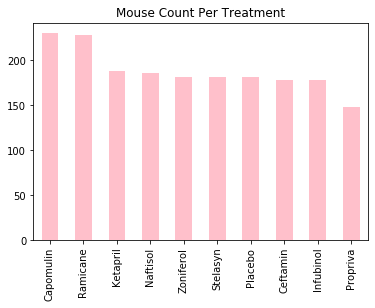

In [25]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.
pandas_bar = analysis_df['Drug Regimen'].value_counts().plot(kind='bar', color = 'pink', title="Mouse Count Per Treatment")

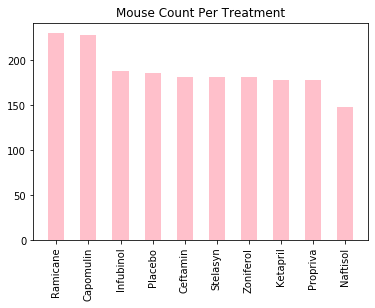

In [24]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_values = analysis_df['Drug Regimen'].unique()
plt.bar(x=x_values, height=analysis_df['Drug Regimen'].value_counts().values, color="pink", width=0.5)
plt.xticks(rotation=90)
plt.title("Mouse Count Per Treatment")
plt.show()

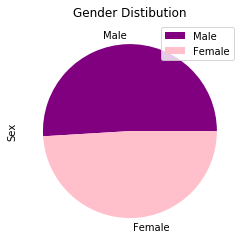

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_dist = analysis_df['Sex'].value_counts()
gender_pie = gender_dist.plot(kind='pie', colors = ["purple", "pink"], title= "Gender Distibution", legend=True)

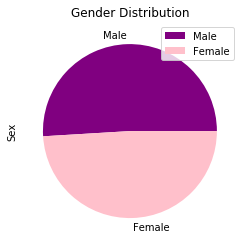

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = analysis_df['Sex'].value_counts()
plt.pie(gender_counts, labels=gender_dist.index, colors=["purple", "pink"])
plt.title('Gender Distribution')
plt.legend()
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Start by getting the last (greatest) timepoint for each mouse
# Using reset_index will return the series as a dataframe
max_df = analysis_df.groupby('Mouse ID')['Timepoint'].max().reset_index()
max_df

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [16]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_merge = analysis_df.merge(max_df, on=['Mouse ID', 'Timepoint'])

In [17]:
max_merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)

tumor_vol = []
# Calculate the IQR and quantitatively determine if there are any potential outliers.
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # Determine outliers using upper and lower bounds
for treatment in treatments:
    final_volume = (max_merge.loc[max_merge["Drug Regimen"]== treatment, "Tumor Volume (mm3)"])
    quartiles = np.quantile(final_volume, [0.25, 0.50, 0.75])
    lowerq = quartiles[0]
    higherq = quartiles[2]
    median = quartiles[1]
    iqr = higherq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = higherq + (1.5 * iqr)
    print(f'Quartile Data for {treatment}:')
    print("------------------------------------------")
    print(f'Lower Quartile of Tumor Volumes: {round(lowerq, 2)}')
    print(f'Upper Quartile of Tumor Volmes: {round(higherq, 2)}')
    print(f'Inner Quartile Range is: {round(iqr, 2)}')
    print(f'Values below {round(lower_bound, 2)} could be outliers, and values above {round(upper_bound, 2)} could be outliers')
    print("------------------------------------------")
    tumor_vol.append(final_volume)

Quartile Data for Capomulin:
------------------------------------------
Lower Quartile of Tumor Volumes: 32.38
Upper Quartile of Tumor Volmes: 40.16
Inner Quartile Range is: 7.78
Values below 20.7 could be outliers, and values above 51.83 could be outliers
------------------------------------------
Quartile Data for Ramicane:
------------------------------------------
Lower Quartile of Tumor Volumes: 31.56
Upper Quartile of Tumor Volmes: 40.66
Inner Quartile Range is: 9.1
Values below 17.91 could be outliers, and values above 54.31 could be outliers
------------------------------------------
Quartile Data for Infubinol:
------------------------------------------
Lower Quartile of Tumor Volumes: 54.05
Upper Quartile of Tumor Volmes: 65.53
Inner Quartile Range is: 11.48
Values below 36.83 could be outliers, and values above 82.74 could be outliers
------------------------------------------
Quartile Data for Ceftamin:
------------------------------------------
Lower Quartile of Tumor Volu

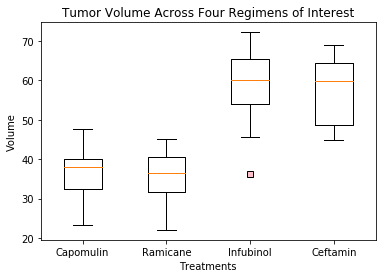

In [37]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
pink_square = dict(markerfacecolor='pink', marker='s')
fig, ax1 = plt.subplots()
ax1.set_title("Tumor Volume Across Four Regimens of Interest")
ax1.set_ylabel("Volume")
ax1.set_xlabel("Treatments")
ax1.boxplot(tumor_vol, flierprops=pink_square )
ax1.set_xticklabels(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor Volume vs Time for Mouse s185')

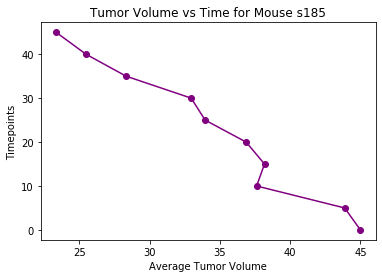

In [20]:
rando_mouse_df = analysis_df.loc[analysis_df['Drug Regimen']== "Capomulin",:]
rando_mouse_df = rando_mouse_df.loc[rando_mouse_df["Mouse ID"]=="s185",:]
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
plt.plot(rando_mouse_df["Tumor Volume (mm3)"], rando_mouse_df["Timepoint"], marker = "o", color="purple")
plt.xlabel('Average Tumor Volume')
plt.ylabel('Timepoints')
plt.title("Tumor Volume vs Time for Mouse s185")
plt.show()

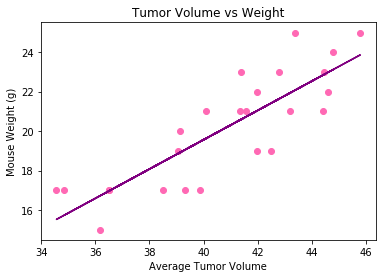

In [23]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_df = analysis_df.copy().loc[analysis_df['Drug Regimen']== "Capomulin",:]
capomulin_df = capomulin_df.groupby("Mouse ID")
avg_vol = capomulin_df["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_df["Weight (g)"].unique().astype(int)

plt.scatter(avg_vol, mouse_weight, color="hotpink")
plt.xlabel('Average Tumor Volume')
plt.ylabel('Mouse Weight (g)')
plt.plot(x_values,regress_values,"r-", color='purple')
plt.title("Tumor Volume vs Weight")
plt.show()

## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = avg_vol
y_values = mouse_weight
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(avg_vol, mouse_weight)
print(f'The equation of the line is {line_eq}, and the correlation coefficient is {round(correlation[0],2)}.')
print('This indicates a strong relationship between weight and tumor volume.')

The equation of the line is y = 0.74x + -10.15, and the correlation coefficient is 0.84.
This indicates a strong relationship between weight and tumor volume.
